In [12]:
#Analysis
#Max temperatures between 70-85 are observed to be most frequent at or near the equator. 
#High percentage of humidity is associated with regions at or within 10 degrees of the equator. 
#Cities on or less than 5 degrees from the equator are likely to experience wind speeds of less than 4MPH. 

In [2]:
#Dependencies 
import requests
import json
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from citipy import citipy

#Import API key
from configweather import wkey

#Output File (CSV)
output_data_file = "output_data/cities.csv"

#Range of latitudes and longitudes 
lat_range = (-10, 10)
lng_range = (-180, 180)

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

In [4]:
#Find cities near equator 
latitude = 0
cities = []
countries = []
columns = ['City', 'Country', 'Max Temperature', 'Humidity', 'Wind Speed', 'Cloudiness', 'Longitude', 'Latitude']

for longitude in range(-180,180): 
    city = citipy.nearest_city(latitude,longitude)
    cities.append(city.city_name)
    countries.append(city.country_code)
    
equatorial_cities = {'City': cities, 'Country': countries}

equatorial_cities_df=pd.DataFrame(equatorial_cities, columns=columns).drop_duplicates().reset_index(drop=True)
equatorial_cities_df.head()

,City,Country,Max Temperature,Humidity,Wind Speed,Cloudiness,Longitude,Latitude
0,vaitupu,wf,NaN,NaN,NaN,NaN,NaN,NaN
1,saleaula,ws,NaN,NaN,NaN,NaN,NaN,NaN
2,samalaeulu,ws,NaN,NaN,NaN,NaN,NaN,NaN
3,lufilufi,ws,NaN,NaN,NaN,NaN,NaN,NaN
4,samusu,ws,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
base_url = "http://api.openweathermap.org/data/2.5/weather"
params = {"q":'', "APPID":wkey}
count=0
backup_weather_data=False

# Use iterrows to iterate through pandas dataframe
for index, row in equatorial_cities_df.iterrows():

    # Get city and country code from dataframe
    city_and_country = f"{row['City']},{row['Country']}"

    # Add keyword to params dict
    params['q'] = city_and_country
    
    try:
        # Assemble url and make API request
        response = requests.get(base_url, params=params).json()
        results  = response.get('cod')
        city     = response.get('name')
        
        # Parse and print weather data and add to dataframe 
        if results == 200:
            #print(response)
            sys     = response['sys']
            country = sys['country']
            weather_metrics = f"\n{city}, {country}: "
            
            main    = response['main']
            temp    = 9/5 * (float(main['temp_max']) - 273) + 32 # Convert Kelvin to Fahrenheit
            humid   = main['humidity']
            equatorial_cities_df.set_value(index, "Max Temperature", temp)
            equatorial_cities_df.set_value(index, "Humidity",        humid)
            weather_metrics += f"max temp: {temp} humidity: {humid} "
            
            wind    = response['wind']
            speed   = wind['speed']
            equatorial_cities_df.set_value(index, "Wind Speed", speed)
            weather_metrics += f"wind: {speed} "
            
            clouds  = response['clouds']
            clouds  = clouds['all']
            equatorial_cities_df.set_value(index, "Cloudiness", clouds)
            weather_metrics += f"clouds: {clouds} "
            
            coord   = response['coord']
            lon     = coord['lon']
            lat     = coord['lat']
            equatorial_cities_df.set_value(index, "Longitude", lon)
            equatorial_cities_df.set_value(index, "Latitude",  lat)
            weather_metrics += f"lon: {lon} lat: {lat} "
            
            print(weather_metrics)
            print('-' * 80)
            
        else:
            if count >= 60:
                print(response)
                backup_weather_data = True
                print('-' * 80)
                break
            count += 1            
            
    except:
        continue


Lufilufi, WS: max temp: 84.46999999999997 humidity: 70 wind: 2.1 clouds: 40 lon: -171.6 lat: -13.87 
--------------------------------------------------------------------------------


/anaconda2/envs/pythonenv/lib/python3.6/site-packages/ipykernel_launcher.py:31: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda2/envs/pythonenv/lib/python3.6/site-packages/ipykernel_launcher.py:32: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda2/envs/pythonenv/lib/python3.6/site-packages/ipykernel_launcher.py:37: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda2/envs/pythonenv/lib/python3.6/site-packages/ipykernel_launcher.py:42: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda2/envs/pythonenv/lib/python3.6/site-packages/ipykernel_launcher.py:48: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or 


Faanui, PF: max temp: 80.29039999999995 humidity: 100 wind: 6.6 clouds: 64 lon: -151.75 lat: -16.48 
--------------------------------------------------------------------------------

Atuona, PF: max temp: 80.4704 humidity: 100 wind: 8.35 clouds: 20 lon: -139.03 lat: -9.8 
--------------------------------------------------------------------------------

San Patricio, MX: max temp: 73.00040000000004 humidity: 99 wind: 0.85 clouds: 12 lon: -104.7 lat: 19.22 
--------------------------------------------------------------------------------

Coahuayana, MX: max temp: 64.18039999999998 humidity: 95 wind: 1.05 clouds: 80 lon: -100.35 lat: 18.62 
--------------------------------------------------------------------------------

Lazaro Cardenas, MX: max temp: 73.63039999999998 humidity: 34 wind: 1.8 clouds: 24 lon: -105.62 lat: 28.39 
--------------------------------------------------------------------------------

Ixtapa, MX: max temp: 80.86999999999996 humidity: 88 wind: 1.5 clouds: 75 lon: -1


Tabou, CI: max temp: 78.40040000000005 humidity: 100 wind: 3.15 clouds: 56 lon: -7.36 lat: 4.42 
--------------------------------------------------------------------------------

Axim, GH: max temp: 76.33039999999997 humidity: 100 wind: 3.2 clouds: 68 lon: -2.24 lat: 4.87 
--------------------------------------------------------------------------------

Takoradi, GH: max temp: 75.43039999999998 humidity: 99 wind: 2.3 clouds: 44 lon: -1.75 lat: 4.89 
--------------------------------------------------------------------------------

Mumford, GH: max temp: 73.63039999999998 humidity: 94 wind: 3.1 clouds: 56 lon: -0.76 lat: 5.26 
--------------------------------------------------------------------------------

Anloga, GH: max temp: 75.46999999999997 humidity: 94 wind: 3.1 clouds: 40 lon: 0.9 lat: 5.79 
--------------------------------------------------------------------------------

Port-Gentil, GA: max temp: 73.66999999999996 humidity: 94 wind: 2.1 clouds: 90 lon: 8.78 lat: -0.72 
-------


Gorontalo, ID: max temp: 80.4704 humidity: 87 wind: 1.4 clouds: 48 lon: 123.06 lat: 0.54 
--------------------------------------------------------------------------------

Tondano, ID: max temp: 88.06999999999996 humidity: 66 wind: 2.6 clouds: 40 lon: 124.91 lat: 1.3 
--------------------------------------------------------------------------------

Sorong, ID: max temp: 82.54039999999995 humidity: 100 wind: 1.6 clouds: 20 lon: 131.25 lat: -0.86 
--------------------------------------------------------------------------------

Manokwari, ID: max temp: 82.54039999999995 humidity: 100 wind: 4.05 clouds: 12 lon: 134.08 lat: -0.87 
--------------------------------------------------------------------------------

Biak, ID: max temp: 81.73039999999997 humidity: 87 wind: 2 clouds: 44 lon: 122.88 lat: -0.91 
--------------------------------------------------------------------------------

Vanimo, PG: max temp: 81.10040000000004 humidity: 100 wind: 3.25 clouds: 32 lon: 141.3 lat: -2.67 
-------

In [15]:
# Drop NaN from dataframe and reset index
equatorial_cities_df = equatorial_cities_df.dropna(axis=0, how='any').reset_index(drop=True)

# Initial weather data collected on April, 05, 2018
#equatorial_cities_df.to_csv('equator_weather_data.csv', index=False)

# Set date for scatter plot title
date = time.strftime("%m/%d/%Y")

# API call to Open Weather Map fails use previously stored weather data
if backup_weather_data:
    equatorial_cities_df = pd.read_csv('equator_weather_data.csv')
    date = '06/23/2018'
    
print(f"There are {equatorial_cities_df.shape[0]} equatorial cities with weather data available in dataframe.")
equatorial_cities_df.head()

There are 106 equatorial cities with weather data available in dataframe.


,City,Country,Max Temperature,Humidity,Wind Speed,Cloudiness,Longitude,Latitude
0,lufilufi,ws,84.47,70,2.1,40,-171.6,-13.87
1,faanui,pf,80.2904,100,6.6,64,-151.75,-16.48
2,atuona,pf,80.4704,100,8.35,20,-139.03,-9.8
3,san patricio,mx,73.0004,99,0.85,12,-104.7,19.22
4,coahuayana,mx,64.1804,95,1.05,80,-100.35,18.62


In [16]:
def create_scatter(data, **kwargs):
    try:
        sns.set() # sets seaborn grid
        sns.lmplot(x=kwargs['xdata'], y=kwargs['ydata'], data=data, fit_reg=False, legend_out=False)

        plt.title(kwargs['title'])
        plt.xlabel(kwargs['xlabel'])
        plt.ylabel(kwargs['ylabel'])

        plt.show()
    
    except:
        print(f"ERROR: Insufficient weather data given to create scatter plot: '{title}'")
        pass


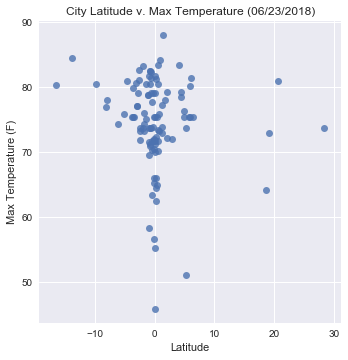

In [17]:
title  = f'City Latitude v. Max Temperature ({date})'
xlabel = 'Latitude'
ylabel = 'Max Temperature (F)'
xdata  = 'Latitude'
ydata  = 'Max Temperature'

create_scatter(data=equatorial_cities_df, title=title, xlabel=xlabel, ylabel=ylabel, xdata=xdata, ydata=ydata)

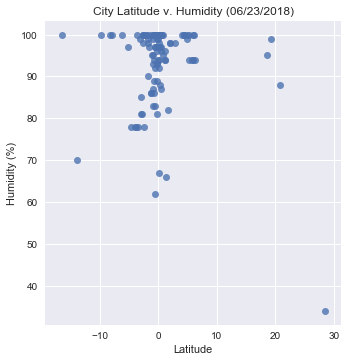

In [18]:
title  = f'City Latitude v. Humidity ({date})'
xlabel = 'Latitude'
ylabel = 'Humidity (%)'
xdata  = 'Latitude'
ydata  = 'Humidity'

create_scatter(data=equatorial_cities_df, title=title, xlabel=xlabel, ylabel=ylabel, xdata=xdata, ydata=ydata)

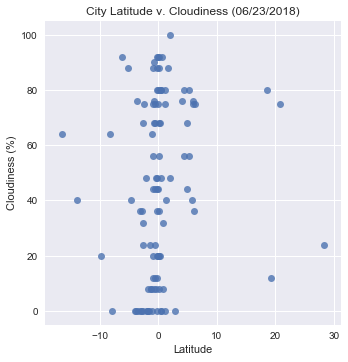

In [19]:
title  = f'City Latitude v. Cloudiness ({date})'
xlabel = 'Latitude'
ylabel = 'Cloudiness (%)'
xdata  = 'Latitude'
ydata  = 'Cloudiness'

create_scatter(data=equatorial_cities_df, title=title, xlabel=xlabel, ylabel=ylabel, xdata=xdata, ydata=ydata)

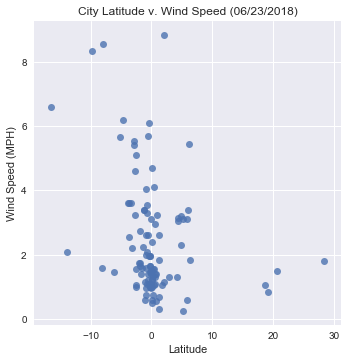

In [20]:
title  = f'City Latitude v. Wind Speed ({date})'
xlabel = 'Latitude'
ylabel = 'Wind Speed (MPH)'
xdata  = 'Latitude'
ydata  = 'Wind Speed'

create_scatter(data=equatorial_cities_df, title=title, xlabel=xlabel, ylabel=ylabel, xdata=xdata, ydata=ydata)